In [13]:
import os
import joblib

import networkx as nx
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

In [6]:
all_edgelists = {
  dirpath[-2:]: joblib.load(os.path.join(dirpath, 'edgelist.pkl')) 
  for dirpath, dirnames, files in tqdm(os.walk('.')) if 'edgelist.pkl' in files}

0it [00:00, ?it/s]

In [19]:
import joblib
from tqdm.auto import tqdm

class ProgressParallel(joblib.Parallel):
    def __init__(self, use_tqdm=True, total=None, desc=None, *args, **kwargs):
        self._use_tqdm = use_tqdm
        self._total = total
        self._desc = desc
        super().__init__(*args, **kwargs)

    def __call__(self, *args, **kwargs):
        with tqdm(disable=not self._use_tqdm, total=self._total, 
                  desc=self._desc) as self._pbar:
            return joblib.Parallel.__call__(self, *args, **kwargs)

    def print_progress(self):
        if self._total is None:
            self._pbar.total = self.n_dispatched_tasks
        self._pbar.n = self.n_completed_tasks
        self._pbar.refresh()

result = ProgressParallel(n_jobs=len(all_edgelists), total=len(all_edgelists))(joblib.delayed(nx.from_pandas_edgelist)(edgelist) for edgelist in all_edgelists.values())

  0%|          | 0/28 [00:00<?, ?it/s]

<AxesSubplot:xlabel='edges', ylabel='nodes'>

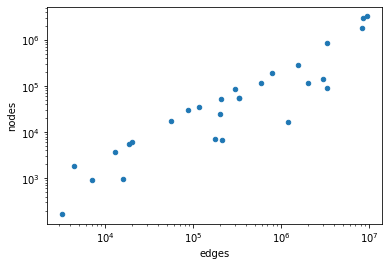

In [36]:

df = pd.DataFrame([dict(edges=graph.number_of_edges(), nodes=graph.number_of_nodes()) for graph in result])
df.plot.scatter(x='edges', y='nodes', loglog=True)

In [ ]:
feature_dict = dict()
for file in os.scandir(f'{dataset_id}/features'):
  for file in os.scandir(f'{dataset_id}/features'):
    if file.is_file():
      feature_dict.update(joblib.load(file.path))
targets=joblib.load('01/targets_sampled.pkl')

tlp.analysis.get_auc(feature_dict, targets)